This notebook provides a streamlined workflow for identifying and visualizing dominant colors in images using KMeans clustering, with clear functions for image loading, color conversion, and result visualization.

#Import Libraries

This cell imports essential Python libraries required for image processing, color clustering, and visualization:


* matplotlib and matplotlib.pyplot for plotting and displaying charts.



* cv2 (OpenCV) for image loading and color space conversion.



* sklearn.cluster.KMeans for clustering pixels to identify dominant colors.



* collections.Counter for counting pixel cluster occurrences.



* os for file system operations.



* numpy for numerical operations on image data.



* Sets %matplotlib inline to display plots directly in the notebook.  








In [ ]:
import matplotlib
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from collections import Counter
import os
import numpy as np

%matplotlib inline


# RGB to HEX Conversion Function
Defines the RGB2HEX function, which converts an RGB color (list of values) to its hexadecimal representation:





* Normalizes RGB values to the range [0, 1] by dividing by 255.

* Uses matplotlib.colors.to_hex to generate the HEX code.
*  Returns the HEX code as a string for use in visualizations.

In [ ]:
def RGB2HEX(color : list) -> str:
    color = list(map(lambda value : value / 255.0, color))
    hex = matplotlib.colors.to_hex(color)
    return hex

# Image Loading Function
Defines the get_image function to load an image from a file path:
* Uses cv2.imread to read the image and cv2.cvtColor to convert it from BGR (OpenCV's default) to RGB color space.



* Returns the image as a NumPy array for further processing.



In [ ]:
def get_image(path : str) -> np.ndarray:
    image = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
    return image

# Dominant Color Extraction Function
Defines the get_rgb function to extract dominant colors from an image using KMeans clustering:





* Resizes the image to half its dimensions to improve processing speed.



* Reshapes the image into a 2D array of pixels (each with RGB values).



* Applies KMeans clustering to group pixels into num_colors clusters.



* Computes cluster centers (dominant RGB colors) and converts them to HEX codes.



* Optionally displays a subplot with the original image and a pie chart showing the distribution of dominant colors (if show_chart=True).



* Returns the RGB values of the cluster centers.



In [ ]:
def get_rgb(image : np.ndarray, num_colors : int, show_chart : bool = False) -> np.ndarray:
    height, width, _=image.shape
    image = cv2.resize(image, (width // 2, height // 2))

    pixel_values = image.reshape((-1, 3))
    km = KMeans(n_clusters = num_colors)
    labels = km.fit_predict(pixel_values)
    centers = km.cluster_centers_
    hex_values = [RGB2HEX(center) for center in centers]
    rgb_values = list(map(lambda value : value / 255.0, centers))

    if show_chart:
        _, axarr = plt.subplots(1, 2, squeeze=False, figsize=(10, 5))
        axarr[0, 0].imshow(image)
        axarr[0, 1].pie(Counter(labels).values(), labels = hex_values, colors = rgb_values)
        plt.show()
    return centers


# Process Images and Visualize Results
This cell executes the color identification process:





* Sets num_colors = 10 to extract 10 dominant colors.



* Iterates over a list of images (assumed to be defined as images elsewhere).



* Calls get_rgb for each image with show_chart=True to display the image and its dominant color pie chart.



* The output includes a visual representation of the image and a pie chart with HEX color labels.



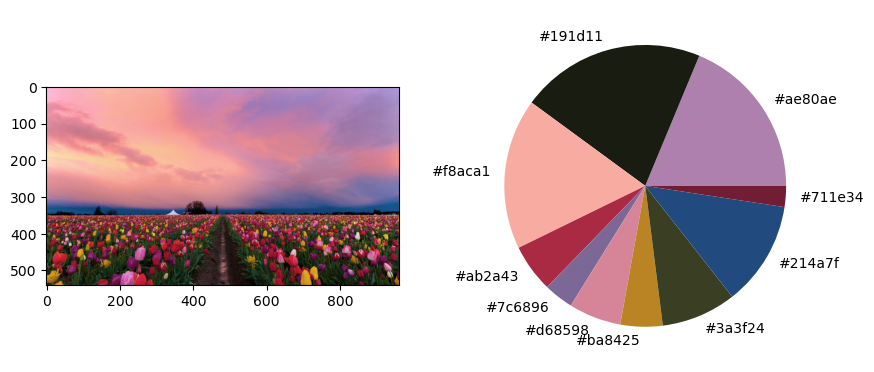

The Colors :  [[174.4732474  127.70171127 174.1538135 ]
 [ 25.15930277  29.33266824  16.75921019]
 [247.64117647 172.140652   161.21368778]
 [171.17196463  41.74876514  67.25776769]
 [124.48186856 104.37855089 149.93301536]
 [214.07216889 133.44885083 152.0680504 ]
 [186.00968465 132.45285737  36.56587162]
 [ 58.43266709  63.04300443  36.05910283]
 [ 32.98130894  74.41750937 126.71179411]
 [112.95407999  29.97784504  52.07615766]]


In [ ]:
image = get_image(r"C:\Users\user\Pictures\Desktop Backgrounds\Image 2.jpg")
num_colors = 10

colors = get_rgb(image, num_colors, True)
print("The Colors : ", colors)

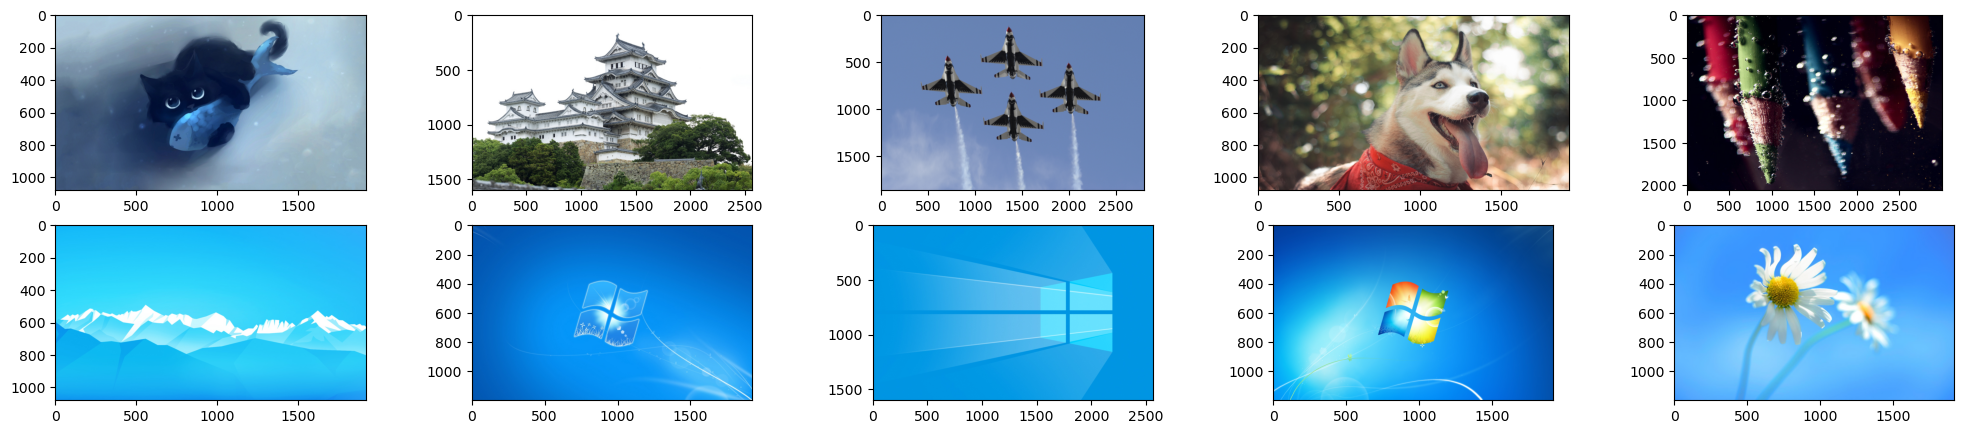

In [ ]:
IMAGES_DIRECTORY = r"C:\Users\user\Pictures\Desktop Backgrounds"
images = []

for file in os.listdir(IMAGES_DIRECTORY):
    if not file.startswith("."):
        images.append(get_image(os.path.join(IMAGES_DIRECTORY,file)))
images = images[:10]  # Ensure ≤10 images

_, axarr = plt.subplots(2, 5, squeeze=False, figsize=(25, 5))
for i in range(len(images)):
    if i <5:
        axarr[0, i].imshow(images[i])

    else:
        axarr[1, i - 5].imshow(images[i])
plt.show()



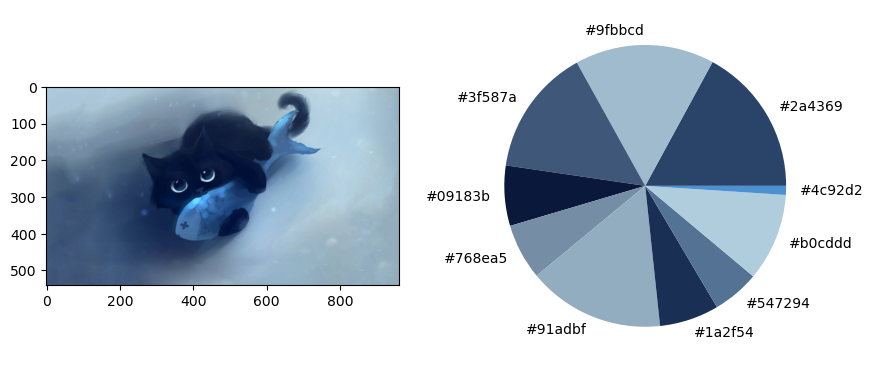

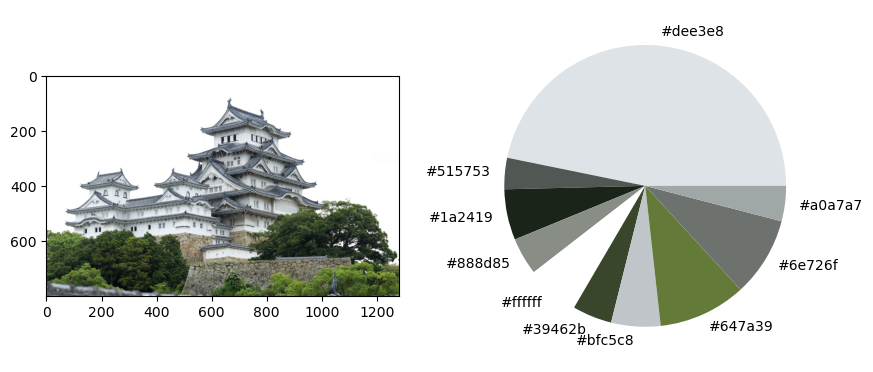

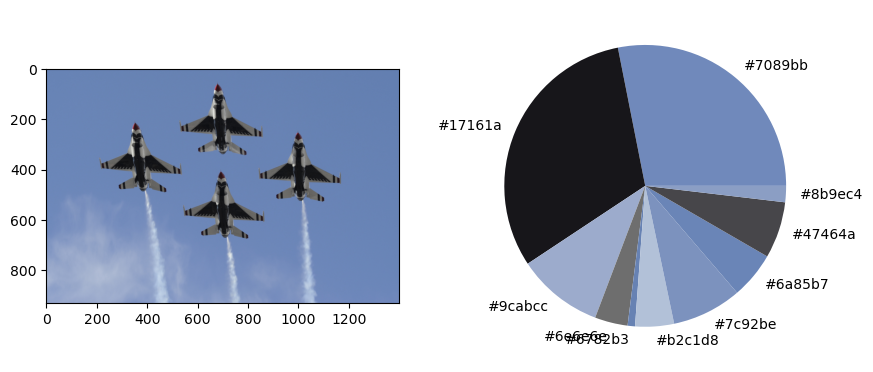

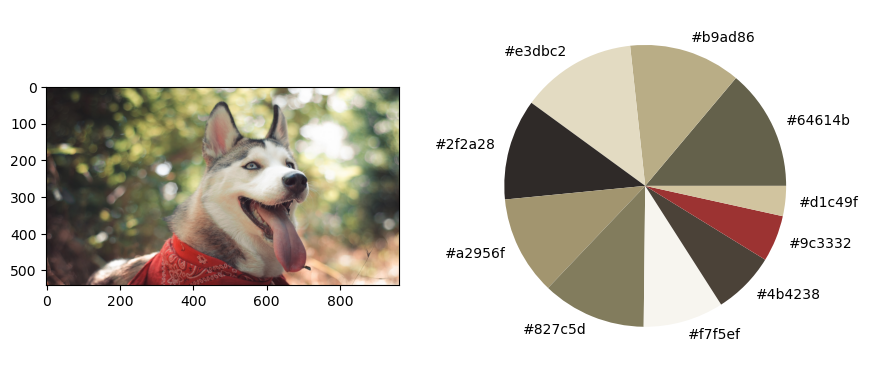

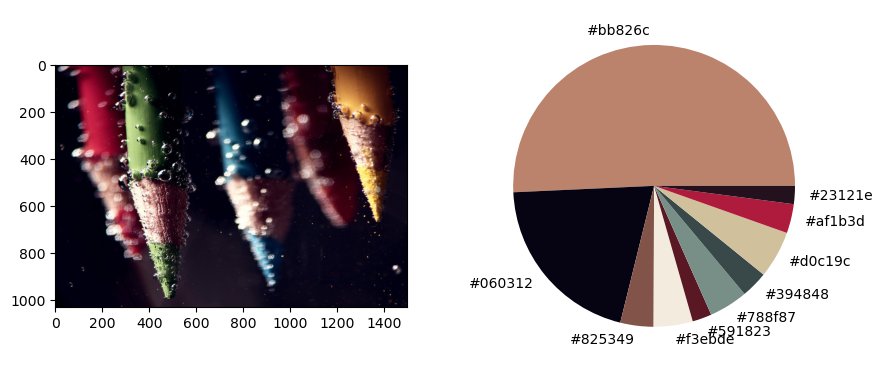

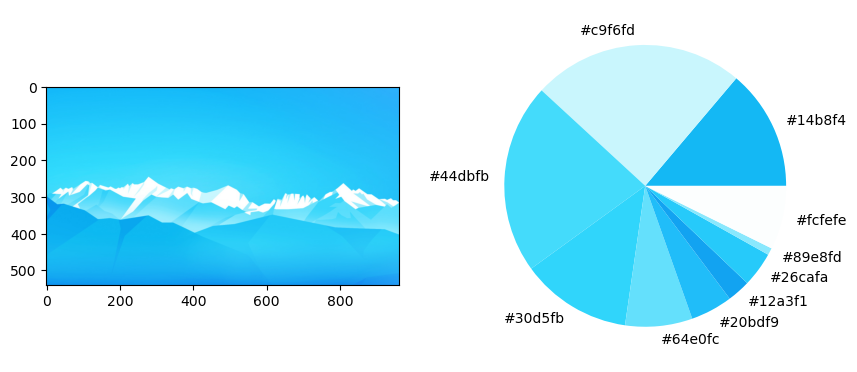

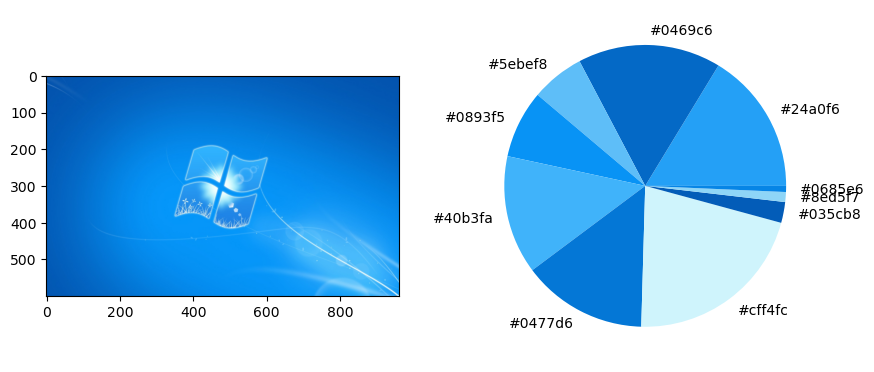

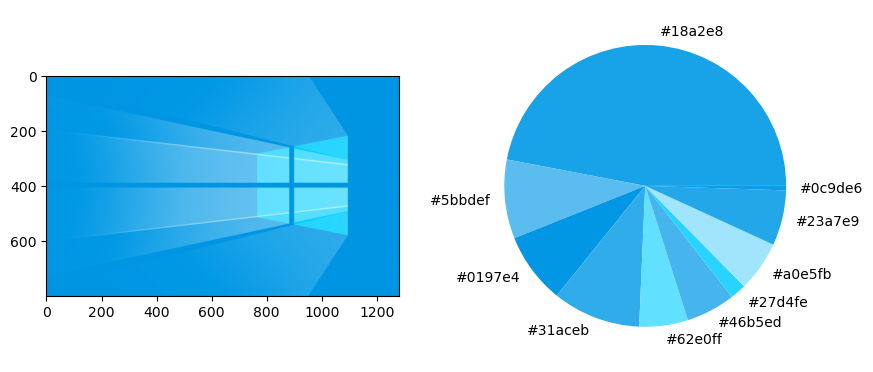

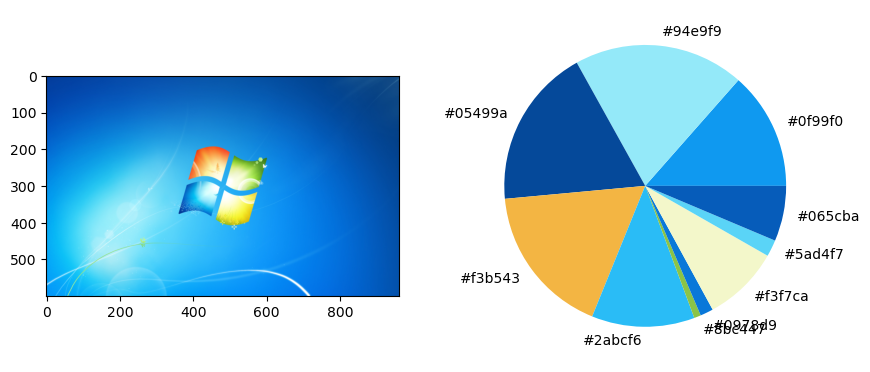

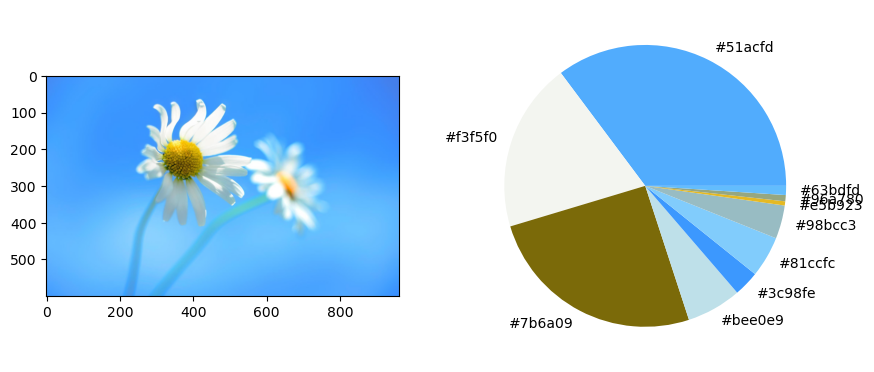

In [ ]:
num_colors = 10

for image in images:
    _ = get_rgb(image, num_colors, True)